In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import os, shutil
from glob import glob

In [2]:
#!pip3 install opencv-python

In [3]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('Data', output="output", seed=1337, ratio=(.7, 0.1,0.2)) 

### Creating data generators

In [5]:
image_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/train'
val_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/val'
test_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test'

In [7]:
batch_size = 80
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='binary')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')

Found 3650 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [8]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [9]:
train_generator

In [ ]:
#train_generator[0]

### CNN Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import optimizers

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2021-11-30 19:04:52.255427: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [13]:
result = model.fit(
    train_generator,
    #steps_per_epoch=8,
    epochs=30,
    validation_data=val_generator,
    #validation_steps=10
)

2021-11-30 19:05:01.637871: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
46/46 [==============================] - 113s 2s/step - loss: 1.1355 - accuracy: 0.6989 - val_loss: 0.5931 - val_accuracy: 0.7428
Epoch 2/30
46/46 [==============================] - 107s 2s/step - loss: 0.6220 - accuracy: 0.7430 - val_loss: 0.6540 - val_accuracy: 0.7428
Epoch 3/30
46/46 [==============================] - 109s 2s/step - loss: 1.0828 - accuracy: 0.7430 - val_loss: 0.6576 - val_accuracy: 0.7428
Epoch 4/30
46/46 [==============================] - 103s 2s/step - loss: 0.5796 - accuracy: 0.7474 - val_loss: 0.4485 - val_accuracy: 0.7889
Epoch 5/30
46/46 [==============================] - 102s 2s/step - loss: 0.4376 - accuracy: 0.8110 - val_loss: 0.3905 - val_accuracy: 0.8177
Epoch 6/30
46/46 [==============================] - 102s 2s/step - loss: 0.3804 - accuracy: 0.8134 - val_loss: 0.3558 - val_accuracy: 0.8541
Epoch 7/30
46/46 [==============================] - 102s 2s/step - loss: 0.5148 - accuracy: 0.8049 - val_loss: 0.3654 - val_accuracy: 0.8464
Epoch 8/30
46

In [14]:
model.save('model_CNN_1_data.h5')

## Eval on model

In [15]:
result.history['accuracy']

[0.6989040970802307,
 0.7430136799812317,
 0.7430136799812317,
 0.747397243976593,
 0.8109589219093323,
 0.8134246468544006,
 0.8049315214157104,
 0.8465753197669983,
 0.8865753412246704,
 0.9035616517066956,
 0.9263013601303101,
 0.9279451966285706,
 0.9498630166053772,
 0.9202739596366882,
 0.9512328505516052,
 0.95917809009552,
 0.9643835425376892,
 0.9679452180862427,
 0.9786301255226135,
 0.9830136895179749,
 0.9808219075202942,
 0.988767147064209,
 0.990136981010437,
 0.9906849265098572,
 0.9931507110595703,
 0.9958904385566711,
 0.9950684905052185,
 0.9972602725028992,
 0.9972602725028992,
 0.9980822205543518]

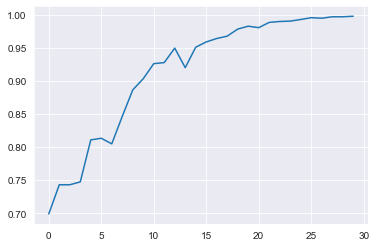

In [16]:
plt.plot(result.history['accuracy'])

In [17]:
model.metrics_names

['loss', 'accuracy']

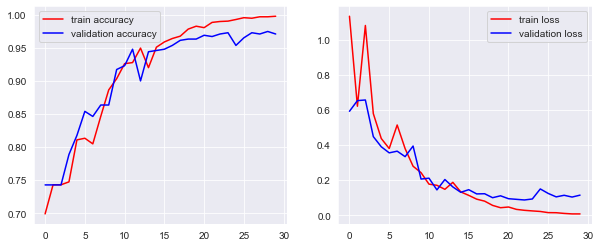

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(result.history['loss'], label='train loss', color='red')
plt.plot(result.history['val_loss'], label='validation loss', color='blue')
plt.legend()

plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
prediction = model.predict(test_generator)

In [21]:
import math
num_of_examples = len(test_generator.filenames)
num_of_generator_calls = math.ceil(num_of_examples/(1.0*80))
test_labels=[]
for i in range(0,int(num_of_generator_calls)):
    test_labels.extend(np.array(test_generator[i][1]))

In [22]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [25]:
type(test_labels)

list

In [26]:
type(prediction)

numpy.ndarray

In [29]:
#confusion_matrix(np.array(test_labels), prediction)

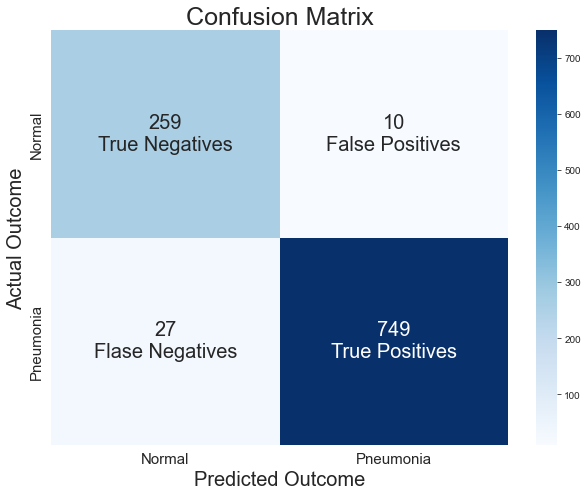

In [28]:
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Normal', 'Pneumonia']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [30]:
print(classification_report(test_labels, np.round(prediction)))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       269
         1.0       0.99      0.97      0.98       776

    accuracy                           0.96      1045
   macro avg       0.95      0.96      0.95      1045
weighted avg       0.97      0.96      0.96      1045

